<a href="https://colab.research.google.com/github/Yuganthi1995/Biostat/blob/master/Biostatistics_Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flashtorch
!pip install barbar

  Created wheel for flashtorch: filename=flashtorch-0.1.3-cp36-none-any.whl size=26247 sha256=91d2d6bb52a788fa388660b231803b0cc4634265da5a0c5c0642b4319f37e168
  Stored in directory: /root/.cache/pip/wheels/03/6d/b1/2d3c5987b69e900fcceceeef39d3ed92dfe46ba1359b9c79f8
Successfully built flashtorch


In [2]:
!pip install git+https://github.com/williamedwardhahn/mpcr
from mpcr import *
from flashtorch.utils import apply_transforms
from flashtorch.saliency import Backprop
import itertools
from sklearn.metrics import confusion_matrix

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-ntl24tdc
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-ntl24tdc
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=7322 sha256=a6d9b67d543cbee6fbee1c14f7a6f150405202dc08f9658a73a27660cd380361
  Stored in directory: /tmp/pip-ephem-wheel-cache-kctcwot2/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create new folder on your google drive like below:

In [4]:
data_dir = '/content/drive/My Drive/Data/'

In [5]:
os.chdir(data_dir)

In [6]:
dataset_labels =["oil", "without oil"] 

In [7]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  #Data Augmentation 
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

In [8]:
batch_size = 16
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [9]:
dataset_sizes

{'train': 80, 'valid': 20}

In [10]:
def imshow(inp, title = " "):
    fig, ax = plt.subplots()
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    ax.imshow(inp)
    plt.title(title, loc='center')
    # fig.set_size_inches(5, 5)
    plt.show()

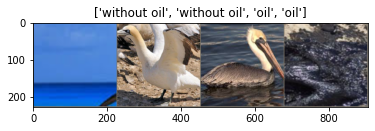

In [12]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs[:4]
classes = classes[:4] 
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[dataset_labels[x] for x in classes])

In [13]:
def train_model(model, num_epochs=25):

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    for epoch in range(num_epochs):

        print('Epoch: ',epoch+1,'/',num_epochs)

        ###Train
        model.train() 
        running_corrects = 0
        for inputs, labels in dataloaders['train']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)

            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        print("Train ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['train']))
        
        scheduler.step()
    
        ###Val
        model.eval()  
        running_corrects = 0
        for inputs, labels in dataloaders['valid']:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            preds = torch.max(outputs, 1)[1]
            running_corrects += torch.sum(preds == labels.data)

        print("Valid ", 'Acc: {:.2f}'.format(running_corrects.double()/dataset_sizes['valid']))
        print("#######################")
    return model

In [14]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 102)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [15]:
model = train_model(model, num_epochs=30)

Epoch:  1 / 30
Train  Acc: 0.21
Valid  Acc: 0.55
#######################
Epoch:  2 / 30
Train  Acc: 0.73
Valid  Acc: 1.00
#######################
Epoch:  3 / 30
Train  Acc: 0.90
Valid  Acc: 1.00
#######################
Epoch:  4 / 30
Train  Acc: 0.93
Valid  Acc: 1.00
#######################
Epoch:  5 / 30
Train  Acc: 0.94
Valid  Acc: 1.00
#######################
Epoch:  6 / 30
Train  Acc: 0.93
Valid  Acc: 1.00
#######################
Epoch:  7 / 30
Train  Acc: 0.91
Valid  Acc: 1.00
#######################
Epoch:  8 / 30
Train  Acc: 0.96
Valid  Acc: 1.00
#######################
Epoch:  9 / 30
Train  Acc: 0.96
Valid  Acc: 1.00
#######################
Epoch:  10 / 30
Train  Acc: 0.95
Valid  Acc: 1.00
#######################
Epoch:  11 / 30
Train  Acc: 0.98
Valid  Acc: 1.00
#######################
Epoch:  12 / 30
Train  Acc: 0.96
Valid  Acc: 1.00
#######################
Epoch:  13 / 30
Train  Acc: 0.96
Valid  Acc: 1.00
#######################
Epoch:  14 / 30
Train  Acc: 0.98
Valid  Acc: 1.

In [16]:
def visualize_model(model, num_images=16):
    model.eval()
    index = 0
    for i, (inputs, labels) in enumerate(dataloaders['valid']):
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)

        preds = torch.max(outputs, 1)[1]

        for j in range(inputs.size()[0]):
            index += 1
            title1 = 'predicted: ' + dataset_labels[preds[j]] + '     class: ' + dataset_labels[labels[j]]
            imshow(inputs.cpu().data[j],title1)

            if index == num_images:
                return

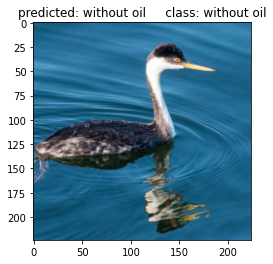

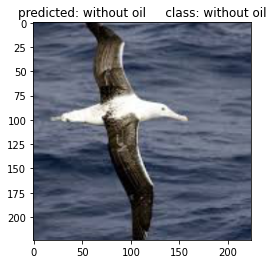

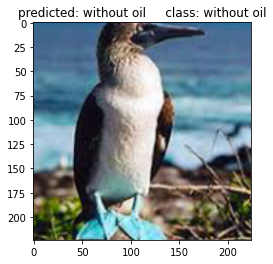

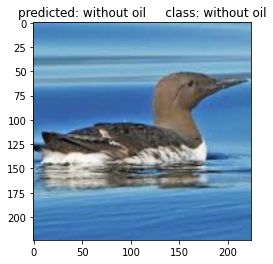

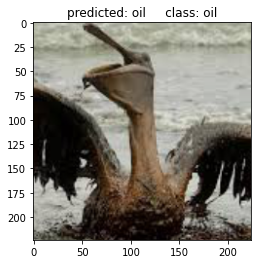

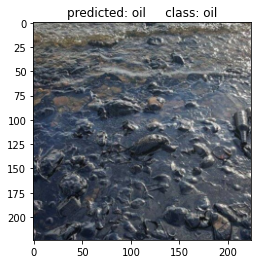

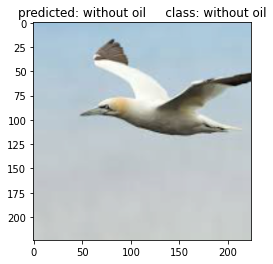

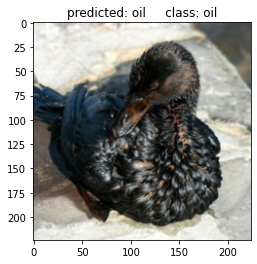

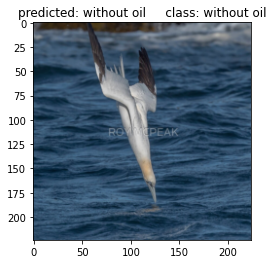

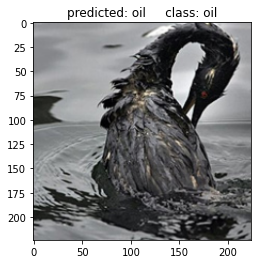

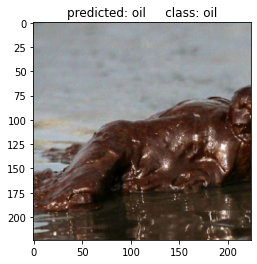

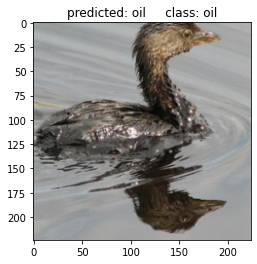

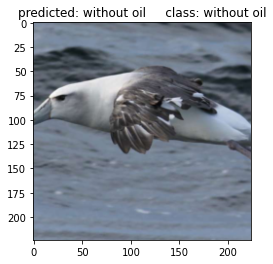

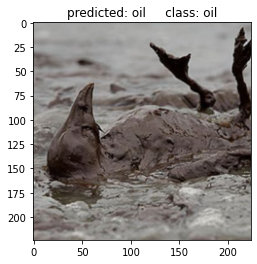

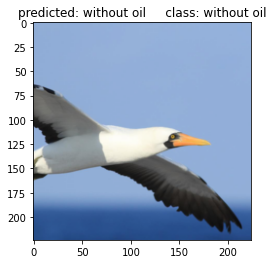

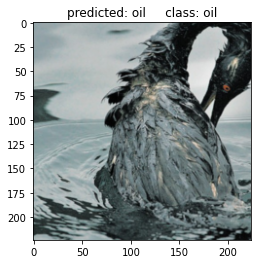

In [17]:
visualize_model(model)

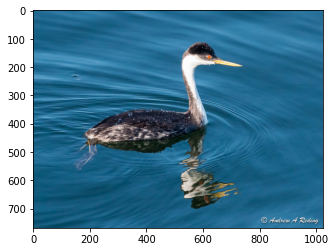

In [18]:
image = io.imread('https://www.eopugetsound.org/sites/default/files/topical_article/images/10298390254_d52ab6b16b_b.jpg')
plt.imshow(image);

In [19]:
img = apply_transforms(image).clone().detach().requires_grad_(True).to(device)

In [20]:
outputs = model(img)
preds = torch.max(outputs, 1)[1]

In [21]:
print('predicted: ' + dataset_labels[preds])

predicted: without oil


In [22]:
batch_size = 1024 #large batch size so we test all the data
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [23]:
inputs,labels = next(iter(dataloaders['valid']))
inputs = inputs.to(device)
labels = labels.detach().cpu().numpy()

In [24]:
outputs = model(inputs)
preds = torch.max(outputs, 1)[1].detach().cpu().numpy()

In [25]:
cm = confusion_matrix(preds.reshape(-1),labels)

In [26]:
print("Confusion Matrix : ")
cm

Confusion Matrix : 


array([[10,  0],
       [ 0, 10]])

Calculate each of the following:

Accuracy (ACC)
The percentage of correctly identified true and false samples.

True positive (TP)
The number of correctly identified samples. 

True negative (TN)
The number of correctly identified negative samples.
 
False positive (FP)
The number of wrongly identified samples, i.e., a commonly called a "false alarm". 
 
False negative (FN)
The number of wrongly identified negative samples. 

Recall (REC)
This metric is also frequently called sensitivity, probability of detection and true positive rate, and it is the ratio of samples that are correctly identified as positive among all existing positive samples.
 
Precision (PREC)
This metric is also frequently called the positive predictive value, and shows the ratio of samples that are correctly identified as positive.

Specificity (SPEC)
This metric is frequently called the true negative rate, and shows the ratio of negatives that are correctly identified as such.
 
F1 score (F1)
A measure of a test’s accuracy by calculating the harmonic mean of the precision and recall.


In [27]:
cm[0,0]

10

In [28]:
cm[1,1]

10

In [29]:
cm[0,1]

0

In [30]:
cm[1,0]

0

In [31]:
Classification_Accuracy = (cm[0,0]+cm[1,1])/20
Classification_Accuracy

1.0

# **Recall Precision and F1 score for Marine animal category**

In [32]:
Precision= cm[0,0]/(cm[0,0]+cm[0,1])
Precision

1.0

In [33]:
Recall = cm[0,0]/(cm[0,0]+cm[1,0])
Recall

1.0

In [34]:
F1_scor = (Precision+Recall)/2
F1_scor

1.0

# Recall Precision and F1 score for Marine animal **category¶**

In [35]:
Precision= cm[1,1]/(cm[1,1]+cm[1,0])
Precision

1.0

In [36]:
Recall = cm[1,1]/(cm[1,1]+cm[0,1])
Recall


1.0

In [37]:
F1_scor = (Precision+Recall)/2
F1_scor

1.0